In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import json as json
import gmaps
import matplotlib.pyplot as plt
from config import google_api_key
gmaps.configure(api_key=google_api_key)

# File to Load (Remember to Change These)
crime_2018 = "Resources/2018-19-data_sa_crime.csv"
crime_2019 = "Resources/2019-20-fullyr-data_sa_crime (1).csv"
crime_2020 = "Resources/2020-21_crime_qtr1_and_qtr2 (1).csv"
sa_postcodes = "Resources/australian_postcodes (1).csv"

# Read data files and store into DataFrames
crime_2018_df = pd.read_csv(crime_2018, parse_dates = ['Reported Date'])
crime_2019_df = pd.read_csv(crime_2019, parse_dates = ['Reported Date'])
crime_2020_df = pd.read_csv(crime_2020, parse_dates = ['Reported Date'])
sa_postcodes_df = pd.read_csv(sa_postcodes)

In [2]:
#merging 4 crime datasets into a merged_data dataframe
merged_data = pd.concat([crime_2018_df,crime_2019_df,crime_2020_df], ignore_index=True)

In [3]:
#cleaning merged_data dataframe and removing rows containing null values
clean_crime_data = merged_data.dropna(how='any')

In [4]:
#renaming SA postcode set to allow merge on shared column
sa_postcodes_df = sa_postcodes_df.rename(columns = {"postcode":"Postcode - Incident",
                                                   'locality': "Suburb - Incident"})

In [5]:
#using loc function to remove any crimes listed against postcode "NOT DISCLOSED"
clean_crime_data = clean_crime_data.loc[clean_crime_data["Postcode - Incident"]!= "NOT DISCLOSED"].copy()

In [6]:
#changing datatype from object to integer to allow merge of two datasets
clean_crime_data["Postcode - Incident"] = clean_crime_data["Postcode - Incident"].astype(str).astype(int)

In [7]:
#Check datatypes of clean_crime_data
#clean_crime_data.dtypes

In [8]:
#Check datatypes of sa_postcodes_df
#sa_postcodes_df.dtypes

In [9]:
#merge both datasets - using left join to drop any postcode data not associated with crimes in SA
crime_postcode_merge_df = pd.merge(clean_crime_data, sa_postcodes_df, on = ["Postcode - Incident", "Suburb - Incident"], how = "left")

In [10]:
#review updated dataframe
crime_postcode_merge_df

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,id,state,long,...,SA2_MAINCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,RA_2011,RA_2016,MMM_2015,MMM_2019
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,15577.0,SA,138.603897,...,403041071.0,Aberfoyle Park,40304.0,Onkaparinga,403.0,Adelaide - South,1.0,1.0,1.0,1.0
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,5.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227842,2020-12-31,WOODCROFT,5162,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1.0,15588.0,SA,138.565224,...,403041084.0,Morphett Vale - East,40304.0,Onkaparinga,403.0,Adelaide - South,1.0,1.0,1.0,1.0
227843,2020-12-31,WOODVILLE,5011,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,1.0,13718.0,SA,138.527677,...,404011090.0,Beverley,40401.0,Charles Sturt,404.0,Adelaide - West,1.0,1.0,1.0,1.0
227844,2020-12-31,WOODVILLE,5011,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1.0,13718.0,SA,138.527677,...,404011090.0,Beverley,40401.0,Charles Sturt,404.0,Adelaide - West,1.0,1.0,1.0,1.0
227845,2020-12-31,WOODVILLE SOUTH,5011,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,13720.0,SA,138.527677,...,404011090.0,Beverley,40401.0,Charles Sturt,404.0,Adelaide - West,1.0,1.0,1.0,1.0


In [11]:
#drop unnecessary columns
crime_postcode_merge_df = crime_postcode_merge_df.drop(columns=['SA2_MAINCODE_2016', 'type', 'sa3', 'SA3_CODE_2016', 
                                      'SA1_MAINCODE_2011', 'id', 'SA1_MAINCODE_2016',
                                      'SA4_CODE_2016','RA_2011','RA_2016','MMM_2015','MMM_2019',
                                      'status','sa4'])

In [12]:
#create new cleaner dataframe by isolating only 2019 & 2020 SA data
crimes_2019_2020_df = crime_postcode_merge_df.loc[(crime_postcode_merge_df["Reported Date"] >= "2019-01-01") & (crime_postcode_merge_df["Reported Date"] <= "2020-12-31") & (crime_postcode_merge_df["state"] == "SA")]

In [13]:
#send new cleaner dataframe to csv
crimes_2019_2020_df.to_csv('crimedata.csv', index=False)

In [14]:
#split new cleaner dataframe into separate 2019 & 2020 dataframes
crimes_2019_df = crimes_2019_2020_df.loc[(crimes_2019_2020_df["Reported Date"] <= "2019-12-31")]
crimes_2020_df = crimes_2019_2020_df.loc[(crimes_2019_2020_df["Reported Date"] >= "2020-01-01")]

In [15]:
crimes_2019_df

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,state,long,lat,dc,sa3name,sa4name,region,Lat_precise,Long_precise,SA2_NAME_2016,SA3_NAME_2016,SA4_NAME_2016
46661,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,2.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46662,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46663,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,4.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46664,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46665,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143816,2019-12-31,WOODCROFT,5162,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,1.0,SA,138.565224,-35.112119,LONSDALE DC,Onkaparinga,Adelaide - South,R2,-35.118261,138.543736,Morphett Vale - East,Onkaparinga,Adelaide - South
143817,2019-12-31,WOODFORDE,5072,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,SA,138.696113,-34.912078,GLYNDE DC,Campbelltown (SA),Adelaide - Central and Hills,R2,-34.906330,138.711614,Uraidla - Summertown,Adelaide Hills,Adelaide - Central and Hills
143818,2019-12-31,WOODFORDE,5072,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,SA,138.696113,-34.912078,GLYNDE DC,Campbelltown (SA),Adelaide - Central and Hills,R2,-34.906330,138.711614,Uraidla - Summertown,Adelaide Hills,Adelaide - Central and Hills
143819,2019-12-31,WOODVILLE GARDENS,5012,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1.0,SA,138.541637,-34.863030,REGENCY PARK DC,Port Adelaide - West,Adelaide - West,R2,-34.864000,138.552000,The Parks,Port Adelaide - West,Adelaide - West


In [16]:
#group new dataframes by suburbs
crimes2019_by_region4_df = crimes_2019_df.groupby(['Suburb - Incident'])
crimes2020_by_region4_df = crimes_2020_df.groupby(['Suburb - Incident'])

In [17]:
#sanity check new dataframes by suburbs
crimes2019_by_region4_df.count().head()

,Reported Date,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,state,long,lat,dc,sa3name,sa4name,region,Lat_precise,Long_precise,SA2_NAME_2016,SA3_NAME_2016,SA4_NAME_2016
Suburb - Incident,,,,,,,,,,,,,,,,,,
ABERFOYLE PARK,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248
ADELAIDE,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952
ADELAIDE AIRPORT,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142
AGERY,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
ALBERT PARK,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90


In [18]:
# Plot 2019 Heatmap
fig = gmaps.figure(map_type='HYBRID', center=(-32, 134.75516), zoom_level=5)

# Store latitude and longitude in locations
locations2019 = crimes_2019_df[["lat", "long"]]

# Fill NaN values and convert to float
humidity2019 = crimes_2019_df["Offence count"]
#max_crimes = crimes_2019_df["Offence count"].max()

# Create heat layer
heat_layer2019 = gmaps.heatmap_layer(locations2019, weights=humidity2019, 
                                 dissipating=False, max_intensity=6707,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer2019)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
crimes_2019_df

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,state,long,lat,dc,sa3name,sa4name,region,Lat_precise,Long_precise,SA2_NAME_2016,SA3_NAME_2016,SA4_NAME_2016
46661,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,2.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46662,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46663,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,4.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46664,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46665,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143816,2019-12-31,WOODCROFT,5162,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,1.0,SA,138.565224,-35.112119,LONSDALE DC,Onkaparinga,Adelaide - South,R2,-35.118261,138.543736,Morphett Vale - East,Onkaparinga,Adelaide - South
143817,2019-12-31,WOODFORDE,5072,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,SA,138.696113,-34.912078,GLYNDE DC,Campbelltown (SA),Adelaide - Central and Hills,R2,-34.906330,138.711614,Uraidla - Summertown,Adelaide Hills,Adelaide - Central and Hills
143818,2019-12-31,WOODFORDE,5072,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,SA,138.696113,-34.912078,GLYNDE DC,Campbelltown (SA),Adelaide - Central and Hills,R2,-34.906330,138.711614,Uraidla - Summertown,Adelaide Hills,Adelaide - Central and Hills
143819,2019-12-31,WOODVILLE GARDENS,5012,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1.0,SA,138.541637,-34.863030,REGENCY PARK DC,Port Adelaide - West,Adelaide - West,R2,-34.864000,138.552000,The Parks,Port Adelaide - West,Adelaide - West


In [20]:
# Plot 2020 Heatmap
fig = gmaps.figure(map_type='HYBRID', center=(-32, 134.75516), zoom_level=5)

# Store latitude and longitude in locations
locations = crimes_2020_df[["lat", "long"]]

# Fill NaN values and convert to float
humidity = crimes_2020_df["Offence count"]
#max_crimes = crimes_2020_df["Offence count"].max()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=6707,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [21]:
#Code not working to break regions for heatmapping
#regions = ["Adelaide - Central and Hills","Adelaide - North","Adelaide - South", "Adelaide - West"]

#adelaide_crimes_2019_df = crimes_2019_df.loc[(crimes_2019_df["SA4_NAME_2016"] == regions),:]

<b> Crimes by Region</b>

* Outlining new dataframes 
* Adding sums for future plotting

In [22]:
#Create count for crimes per region
region_crime_2019 = crimes2019_by_region4_df["Offence count"].sum()
region_crime_2020 = crimes2020_by_region4_df["Offence count"].sum()

In [23]:
#check 2019 regional figures
region_crime_2019

Suburb - Incident
ABERFOYLE PARK       275.0
ADELAIDE            6707.0
ADELAIDE AIRPORT     151.0
AGERY                  6.0
ALBERT PARK          105.0
                     ...  
YEELANNA               2.0
YONGALA                2.0
YORKETOWN             13.0
YOUNGHUSBAND           3.0
YUNTA                  4.0
Name: Offence count, Length: 1209, dtype: float64

In [24]:
#check 2020 regional figures
region_crime_2020

Suburb - Incident
ABERFOYLE PARK       264.0
ADELAIDE            6142.0
ADELAIDE AIRPORT     135.0
ALBERT PARK           80.0
ALBERTON             153.0
                     ...  
YELTA                  1.0
YINKANIE               1.0
YORKETOWN              7.0
YOUNGHUSBAND           2.0
YUMALI                 2.0
Name: Offence count, Length: 1190, dtype: float64

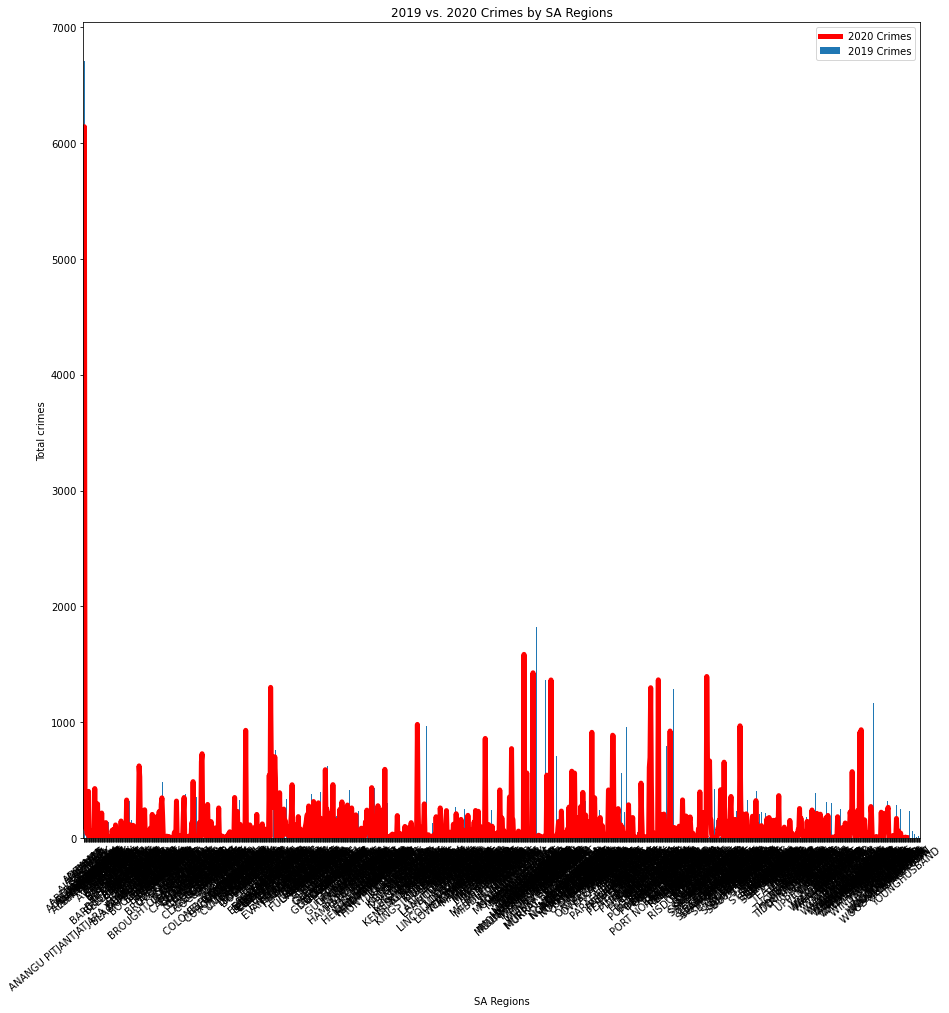

In [25]:
#create 2019 v 2020 bar/line plt 
region_crime_2019.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', figsize = (15, 15), label='2019 Crimes')
region_crime_2020.plot(x = 'Reported Date', y = 'Offence count', color ='red', label='2020 Crimes', linewidth=5)
plt.xticks(rotation=40)
plt.legend()
plt.ylabel("Total crimes")
plt.xlabel("SA Regions")
plt.title("2019 vs. 2020 Crimes by SA Regions")
plt.show()

<b> Personal Crimes by Region & Crime Type Data</b>

* Outlining new dataframes 
* Adding sums for future plotting

In [26]:
#split each dataframe by crime type and regional
crimes2019_by_region4_type_df = crimes_2019_df.groupby(['sa4name', 'Offence Level 1 Description'])
crimes2020_by_region4_type_df = crimes_2020_df.groupby(['sa4name', 'Offence Level 1 Description'])

In [27]:
#define new dataframes for personal/property crimes for each year
property_crimes_2019_df = crimes_2019_df.loc[(crimes_2019_df["Offence Level 1 Description"] == "OFFENCES AGAINST PROPERTY")]
personal_crimes_2019_df = crimes_2019_df.loc[(crimes_2019_df["Offence Level 1 Description"] == "OFFENCES AGAINST THE PERSON")]
property_crimes_2020_df = crimes_2020_df.loc[(crimes_2020_df["Offence Level 1 Description"] == "OFFENCES AGAINST PROPERTY")]
personal_crimes_2020_df = crimes_2020_df.loc[(crimes_2020_df["Offence Level 1 Description"] == "OFFENCES AGAINST THE PERSON")]

<b> Personal Crimes by Crime Type Data</b>

* Outlining new dataframes 
* Adding sums for future plotting

In [28]:
#define new dataframes for personal crimes for crime type
personal_crimes_breakdown_2019_df = personal_crimes_2019_df.groupby(['Offence Level 2 Description'])
personal_crimes_breakdown_2020_df = personal_crimes_2020_df.groupby(['Offence Level 2 Description'])

In [29]:
#add sum for each new dataframe to plot
crimes_by_type_2019 = personal_crimes_breakdown_2019_df["Offence count"].sum()
crimes_by_type_2020 = personal_crimes_breakdown_2020_df["Offence count"].sum()

<b> Acts Intended to cause injury review </b>

* Outlining new dataframes 
* Adding sums for future plotting

In [30]:
injury_crimes_2019_df = crimes_2019_df.loc[(crimes_2019_df["Offence Level 2 Description"] == "ACTS INTENDED TO CAUSE INJURY")]
injury_crimes_2020_df = crimes_2020_df.loc[(crimes_2020_df["Offence Level 2 Description"] == "ACTS INTENDED TO CAUSE INJURY")]

In [31]:
#define new dataframes for injury crimes for each year
injury_crimes_2019_grouped_df = injury_crimes_2019_df.groupby(['Offence Level 3 Description'])
injury_crimes_2020_grouped_df = injury_crimes_2020_df.groupby(['Offence Level 3 Description'])

In [32]:
#add sum for each new dataframe to plot
injurycrimes_2019 = injury_crimes_2019_grouped_df["Offence count"].sum()
injurycrimes_2020 = injury_crimes_2020_grouped_df["Offence count"].sum()

<b> Crimes Types by Region</b>

* Outlining new dataframes 
* Adding sums for future plotting

In [33]:
#group new dataframes by region
property_crimes_2019_region_df = property_crimes_2019_df.groupby(['sa4name'])
property_crimes_2020_region_df = property_crimes_2020_df.groupby(['sa4name'])
personal_crimes_2019_region_df = personal_crimes_2019_df.groupby(['sa4name'])
personal_crimes_2020_region_df = personal_crimes_2020_df.groupby(['sa4name'])

In [34]:
#add sum for each new dataframe to plot
region_crime_property_2019 = property_crimes_2019_region_df["Offence count"].sum()
region_crime_person_2019 = personal_crimes_2019_region_df["Offence count"].sum()
region_crime_property_2020 = property_crimes_2020_region_df["Offence count"].sum()
region_crime_person_2020 = personal_crimes_2020_region_df["Offence count"].sum()

<b>Bar/Line Graphs comparing rates of Property Crimes by Region, then Personal Crimes by Region</b>


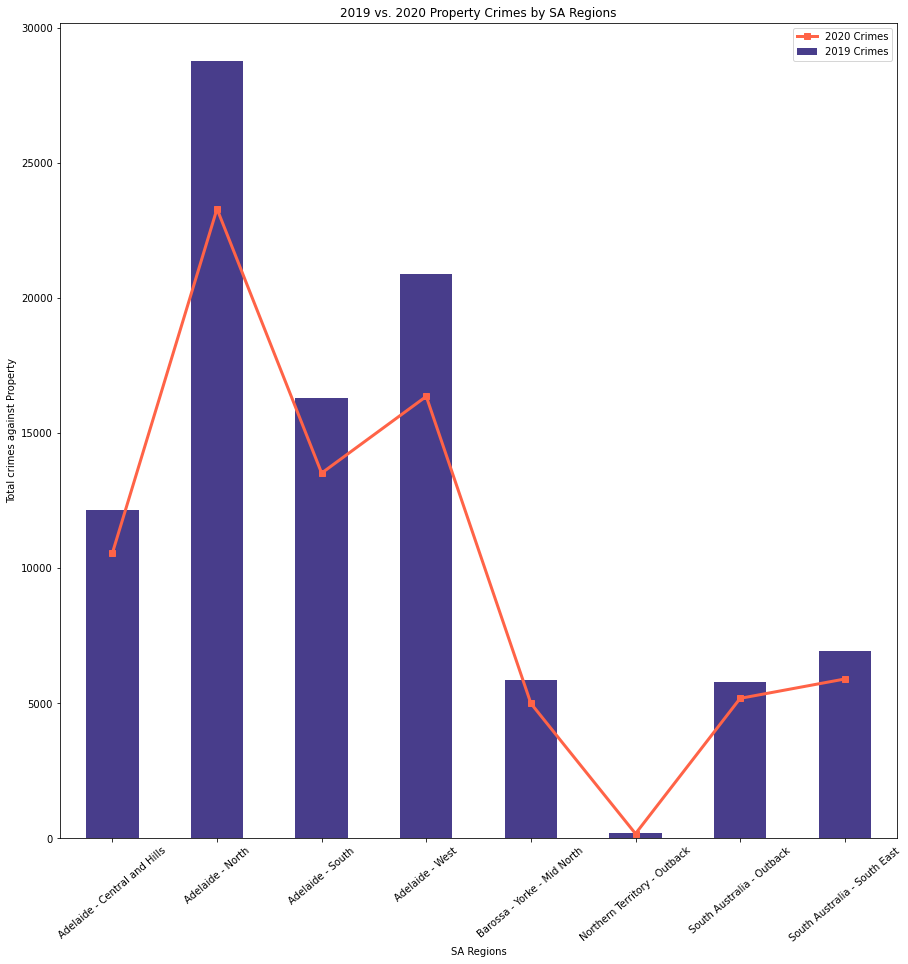

In [35]:
#create 2019 v 2020 comparison for property crimes
region_crime_property_2019.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', color = 'darkslateblue',figsize = (15, 15), label='2019 Crimes')
region_crime_property_2020.plot(x = 'Reported Date', y = 'Offence count', color ='tomato', label='2020 Crimes', marker='s', markeredgecolor='tomato', markerfacecolor='tomato', linewidth=3)
plt.xticks(rotation=40)
plt.xticks(rotation=40)
plt.legend()
plt.ylabel("Total crimes against Property")
plt.xlabel("SA Regions")
plt.title("2019 vs. 2020 Property Crimes by SA Regions")
plt.show()

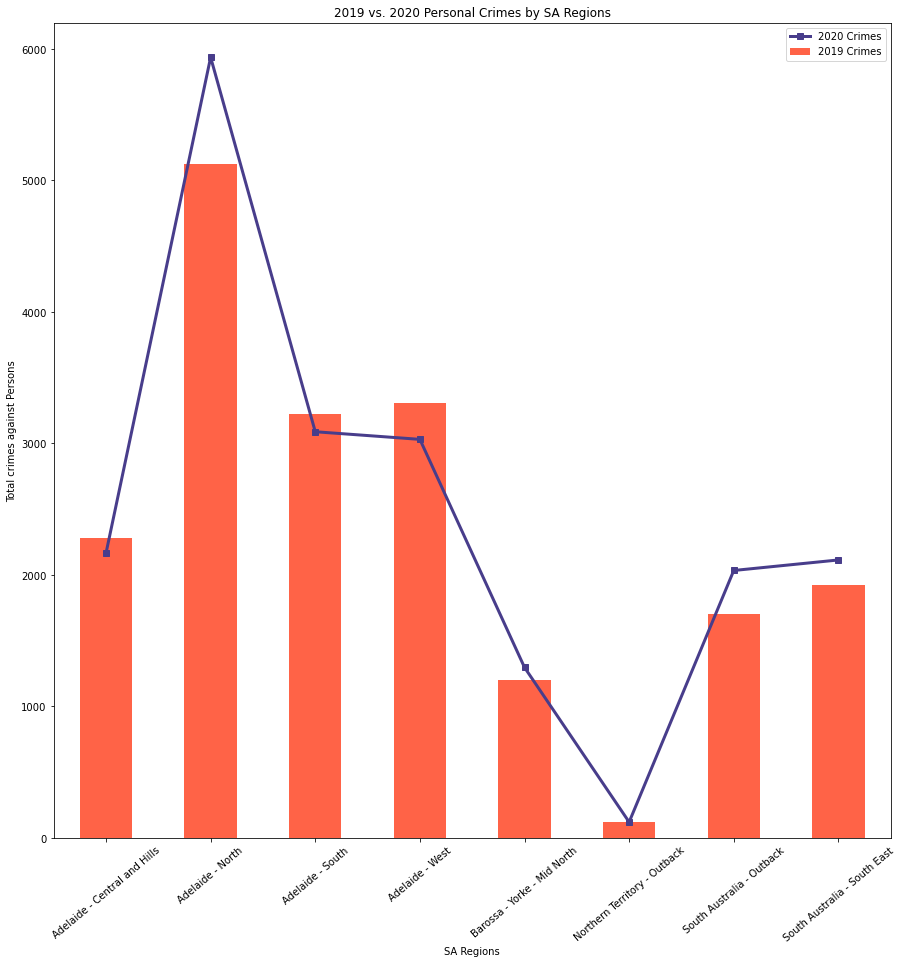

In [36]:
#create 2019 v 2020 comparison for personal crimes 
region_crime_person_2019.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', color ='tomato', figsize = (15, 15), label='2019 Crimes')
region_crime_person_2020.plot(x = 'Reported Date', y = 'Offence count', label='2020 Crimes', color ='darkslateblue', marker='s', markeredgecolor='darkslateblue', markerfacecolor='darkslateblue', linewidth=3)
plt.xticks(rotation=40)
plt.legend()
plt.ylabel("Total crimes against Persons")
plt.ylim(0,6200)
plt.xlabel("SA Regions")
plt.title("2019 vs. 2020 Personal Crimes by SA Regions")
plt.show()

In [37]:
# Plot 2019 Heatmap
fig = gmaps.figure(map_type='HYBRID', center=(-32, 134.75516), zoom_level=5)

# Store latitude and longitude in locations
locations2019 = personal_crimes_2019_df[["lat", "long"]]

# Fill NaN values and convert to float
humidity2019 = personal_crimes_2019_df["Offence count"]
#max_crimes = crimes_2019_df["Offence count"].max()

# Create heat layer
heat_layer2019 = gmaps.heatmap_layer(locations2019, weights=humidity2019, 
                                 dissipating=False, max_intensity=1384,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer2019)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Plot 2019 Heatmap
fig = gmaps.figure(map_type='HYBRID', center=(-32, 134.75516), zoom_level=5)

# Store latitude and longitude in locations
locations2020 = personal_crimes_2020_df[["lat", "long"]]

# Fill NaN values and convert to float
humidity2020 = personal_crimes_2020_df["Offence count"]
#max_crimes = crimes_2019_df["Offence count"].max()

# Create heat layer
heat_layer2020 = gmaps.heatmap_layer(locations2020, weights=humidity2020, 
                                 dissipating=False, max_intensity=1384,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer2020)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
#group new dataframes by offence type
crimes_by_type_2019_df = crimes_2019_df.groupby(['Offence Level 1 Description'])
crimes_by_type_2020_df = crimes_2020_df.groupby(['Offence Level 1 Description'])

In [40]:
#create value count for 
crime_count_2019 = crimes_by_type_2019_df["Offence count"].sum()
crime_count_2020 = crimes_by_type_2020_df["Offence count"].sum()
crime_count_2019

Offence Level 1 Description
OFFENCES AGAINST PROPERTY      96786.0
OFFENCES AGAINST THE PERSON    18897.0
Name: Offence count, dtype: float64

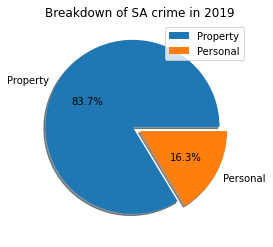

In [41]:
# Generate a pie plot showing the distribution of property vs personal crimes in 2019
labels = ["Property","Personal"]

# The values of each section of the pie chart
crime2019 = crime_count_2019

# The colors of each section of the pie chart
colors = ["#1f77b4","#ff7f0e"]

plt.pie(crime2019, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, explode = [0.1, 0])
plt.legend()
plt.title("Breakdown of SA crime in 2019")
plt.show()

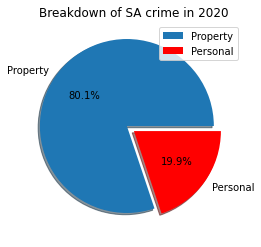

In [42]:
# Generate a pie plot showing the distribution of property vs personal crimes in 2020
labels = ["Property","Personal"]

# The values of each section of the pie chart
crime2020 = crime_count_2020

# The colors of each section of the pie chart
colors = ["#1f77b4","red"]

plt.pie(crime2020, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, explode = [0.1, 0])
plt.legend()
plt.title("Breakdown of SA crime in 2020")
plt.show()

<b> Bar/Line Chart looking at Personal Crimes by Type

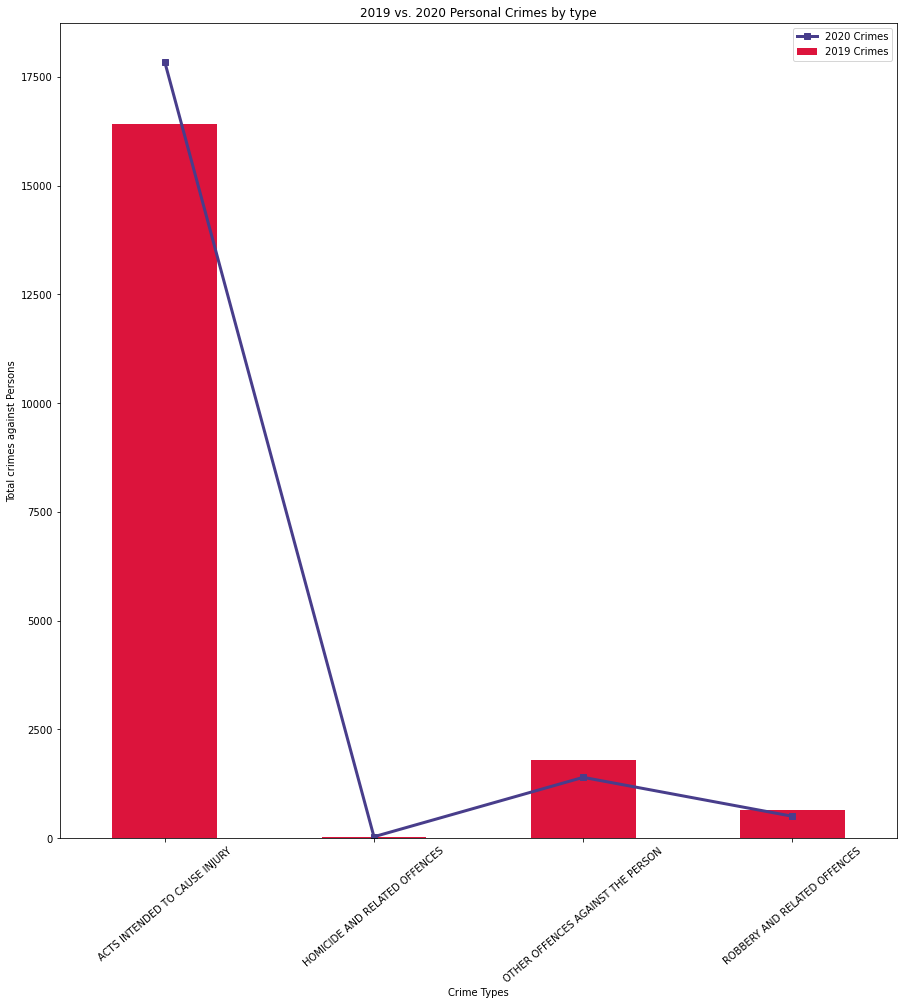

In [43]:
#create 2019 v 2020 breakdown for personal crimes 
crimes_by_type_2019.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', color ='crimson', figsize = (15, 15), label='2019 Crimes')
crimes_by_type_2020.plot(x = 'Reported Date', y = 'Offence count', label='2020 Crimes', color ='darkslateblue', marker='s', markeredgecolor='darkslateblue', markerfacecolor='darkslateblue', linewidth=3)
plt.xticks(rotation=40)
plt.legend()
plt.ylabel("Total crimes against Persons")
plt.xlabel("Crime Types")
plt.title("2019 vs. 2020 Personal Crimes by type")
plt.show()

<b>Bar/Line & Pie Charts looking at Acts intended to cause injury

In [44]:
injurycrimes_2019 = injury_crimes_2019_grouped_df["Offence count"].sum()
injurycrimes_2020 = injury_crimes_2020_grouped_df["Offence count"].sum()

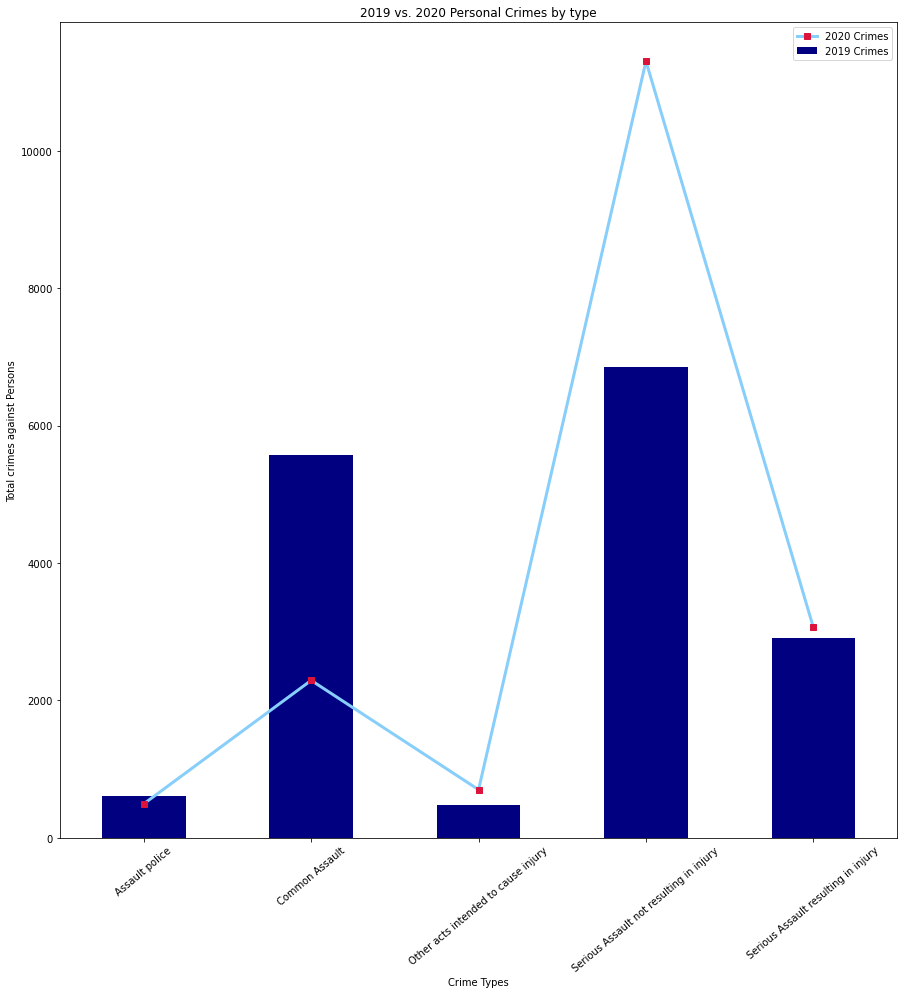

In [45]:
#create 2019 v 2020 breakdown for personal crimes 
injurycrimes_2019.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', color ='navy', figsize = (15, 15), label='2019 Crimes')
injurycrimes_2020.plot(x = 'Reported Date', y = 'Offence count', label='2020 Crimes', color ='lightskyblue', marker='s', markeredgecolor='crimson', markerfacecolor='crimson', linewidth=3)
plt.xticks(rotation=40)
plt.legend()
plt.ylabel("Total crimes against Persons")
plt.xlabel("Crime Types")
plt.title("2019 vs. 2020 Personal Crimes by type")
plt.show()

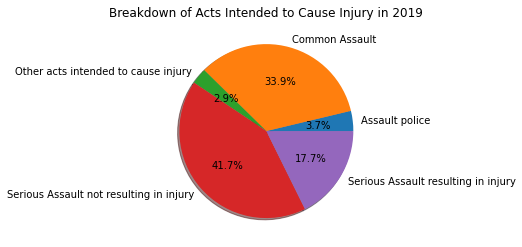

In [46]:
#set labels
labels = injurycrimes_2019.index

#generate plot
plt.pie(injurycrimes_2019, labels=labels, autopct="%1.1f%%", shadow=True)
plt.title("Breakdown of Acts Intended to Cause Injury in 2019")
plt.show()

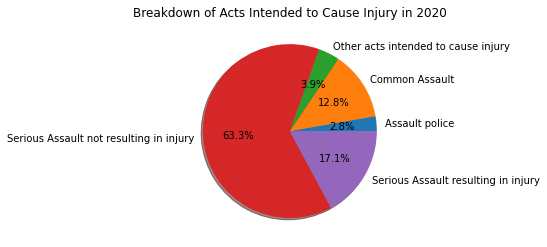

In [47]:
#set labels
labels = injurycrimes_2020.index

#generate plot
plt.pie(injurycrimes_2020, labels=labels, autopct="%1.1f%%", shadow=True)
plt.title("Breakdown of Acts Intended to Cause Injury in 2020")
plt.show()

<b>Case Study - Acts Intended to Cause Injury in Adelaide North 

In [56]:
adel_north_injury_crimes_2019_df = injury_crimes_2019_df.loc[(injury_crimes_2019_df['sa4name']== 'Adelaide - North')]
adel_north_injury_crimes_2020_df = injury_crimes_2020_df.loc[(injury_crimes_2020_df['sa4name']== 'Adelaide - North')]

In [58]:
#define new dataframes for acts to cause injury crimes for each year/region
adelnth_injuryacts_2019_df = adel_north_injury_crimes_2019_df.groupby(['Offence Level 3 Description'])
adelnth_injuryacts_2020_df = adel_north_injury_crimes_2020_df.groupby(['Offence Level 3 Description'])

In [61]:
injuryacts_2019_adelnth = adelnth_injuryacts_2019_df["Offence count"].sum()
injuryacts_2020_adelnth = adelnth_injuryacts_2020_df["Offence count"].sum()

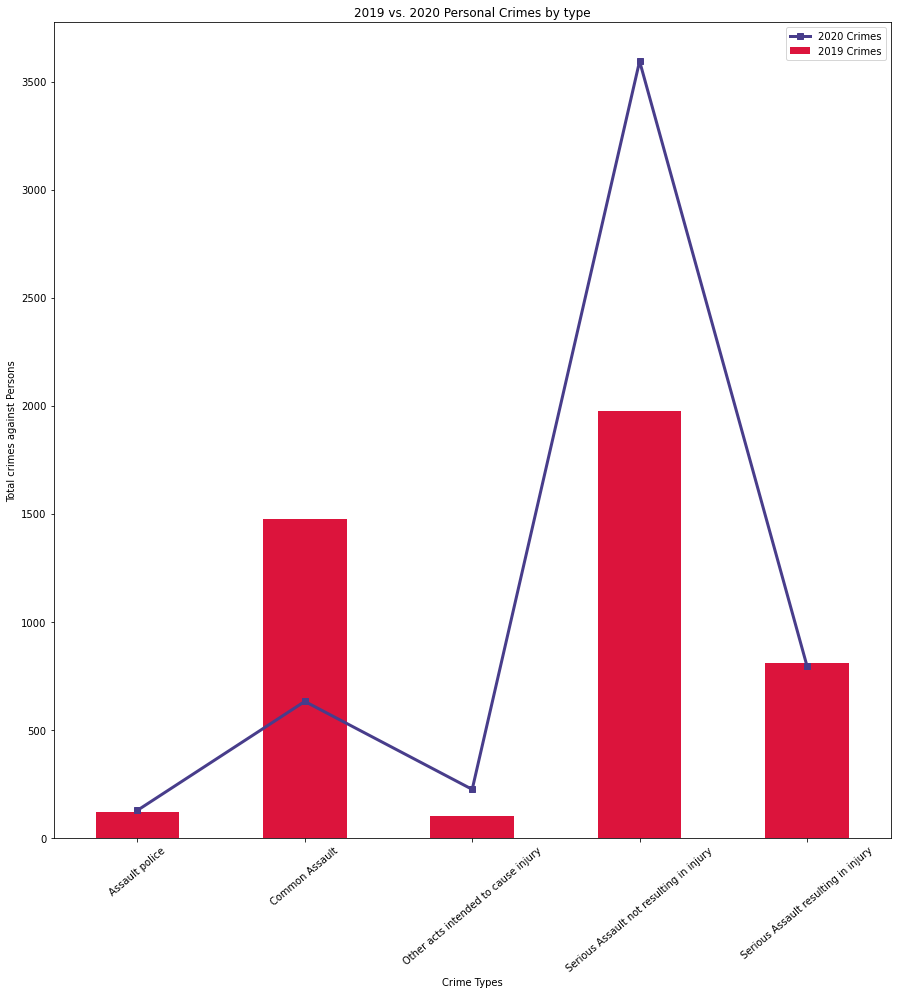

In [60]:
#create 2019 v 2020 breakdown for Adelaide personal crimes 
injuryacts_2019_adelnth.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', color ='crimson', figsize = (15, 15), label='2019 Crimes')
injuryacts_2020_adelnth.plot(x = 'Reported Date', y = 'Offence count', label='2020 Crimes', color ='darkslateblue', marker='s', markeredgecolor='darkslateblue', markerfacecolor='darkslateblue', linewidth=3)
plt.xticks(rotation=40)
plt.legend()
plt.ylabel("Total crimes against Persons")
plt.xlabel("Crime Types")
plt.title("2019 vs. 2020 Acts Intended to Cause Injury in Adelaide - North")
plt.show()

<B> Zohaib's Review of Crimes by Type

In [70]:
total_2019_l1 = crimes_2019_df.groupby(["Offence Level 1 Description"])
total_2019_new_l1 = total_2019_l1.sum()['Offence count']
total_2020_l1 = crimes_2020_df.groupby(["Offence Level 1 Description"])
total_2020_new_l1 = total_2020_l1.sum()['Offence count']
frames_2019_2020 = [total_2019_new_l1, total_2020_new_l1]
result_2019_2020 = pd.merge(total_2019_new_l1, total_2020_new_l1, on= "Offence Level 1 Description")
result_l1_new = result_2019_2020.rename(columns = {"Offence count_x":"Offence 2019","Offence count_y":"Offence 2020"})
result_l1_new


,Offence 2019,Offence 2020
Offence Level 1 Description,,
OFFENCES AGAINST PROPERTY,96786.0,79885.0
OFFENCES AGAINST THE PERSON,18897.0,19789.0


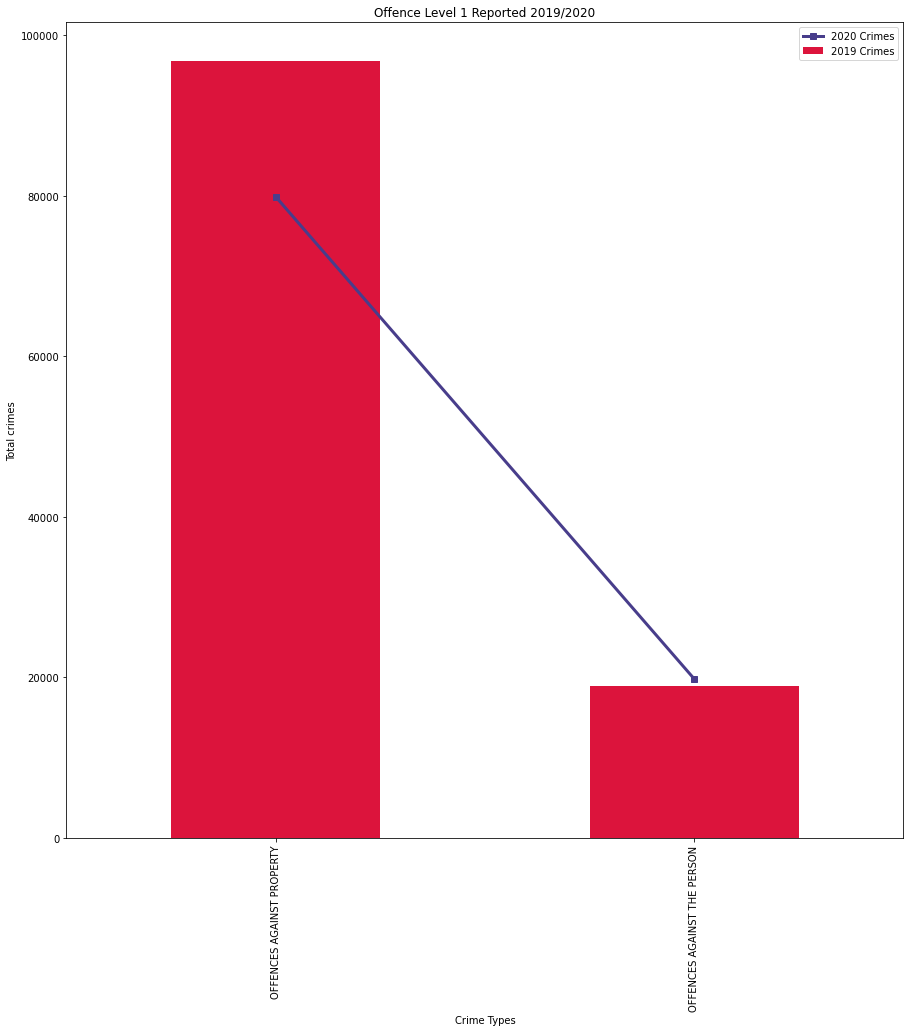

In [71]:
total_2019_new_l1.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', color ='crimson', figsize = (15, 15), label='2019 Crimes')
total_2020_new_l1.plot(x = 'Reported Date', y = 'Offence count', label='2020 Crimes', color ='darkslateblue', marker='s', markeredgecolor='darkslateblue', markerfacecolor='darkslateblue', linewidth=3)
plt.xticks(rotation=90)
plt.legend()
plt.ylabel("Total crimes")
plt.xlabel("Crime Types")
plt.title("Offence Level 1 Reported 2019/2020")
plt.show()

<b>Crime Review by Crime Type

In [69]:
total_2019_l2 = crimes_2019_df.groupby(["Offence Level 2 Description"])
total_2019_new_l2 = total_2019_l2.sum()['Offence count']
total_2020_l2 = crimes_2020_df.groupby(["Offence Level 2 Description"])
total_2020_new_l2 = total_2020_l2.sum()['Offence count']
frames_2019_2020 = [total_2019_new_l2, total_2020_new_l2]
result_2019_2020 = pd.merge(total_2019_new_l2, total_2020_new_l2, on= "Offence Level 2 Description")
result_l2_new = result_2019_2020.rename(columns = {"Offence count_x":"Offence 2019","Offence count_y":"Offence 2020"})
result_l2_new

,Offence 2019,Offence 2020
Offence Level 2 Description,,
ACTS INTENDED TO CAUSE INJURY,16412.0,17849.0
FRAUD DECEPTION AND RELATED OFFENCES,3878.0,2853.0
HOMICIDE AND RELATED OFFENCES,38.0,35.0
OTHER OFFENCES AGAINST THE PERSON,1790.0,1400.0
PROPERTY DAMAGE AND ENVIRONMENTAL,21815.0,20295.0
ROBBERY AND RELATED OFFENCES,657.0,505.0
SERIOUS CRIMINAL TRESPASS,16398.0,12559.0
THEFT AND RELATED OFFENCES,54695.0,44178.0


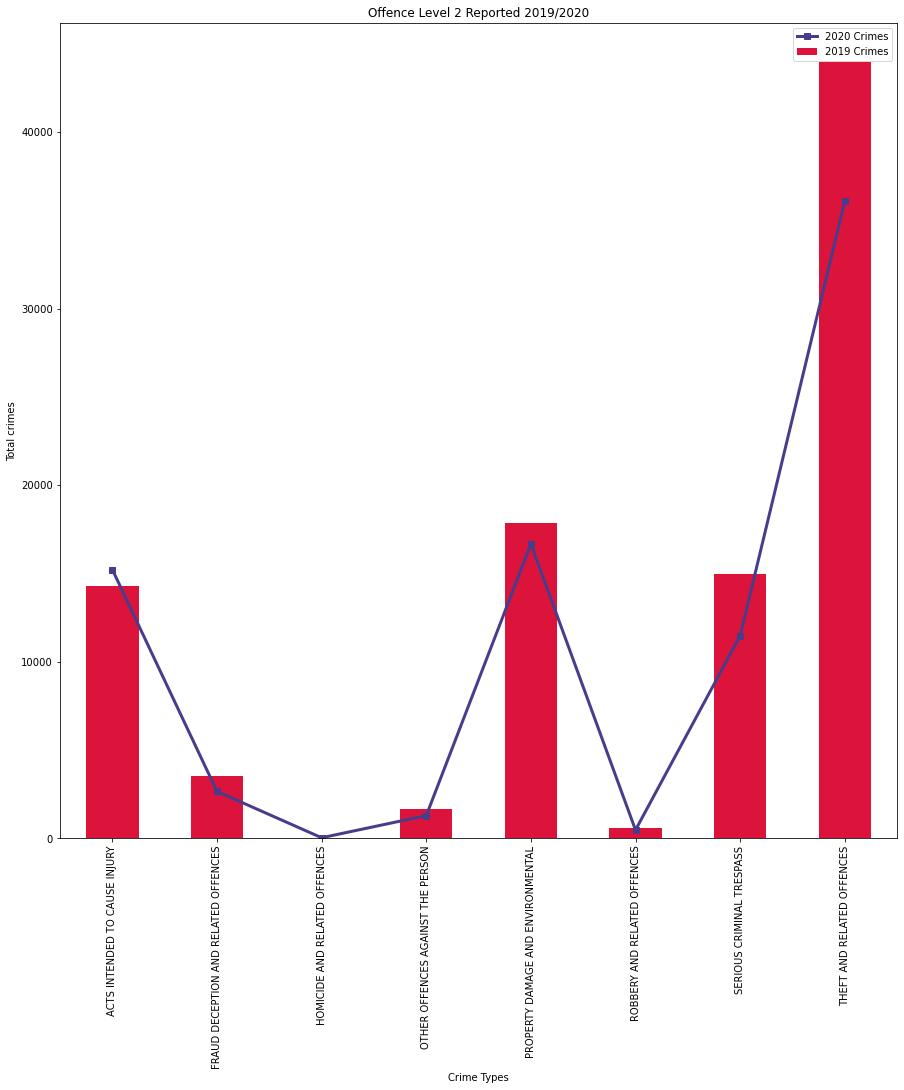

In [65]:
total_2019_new_l2.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', color ='crimson', figsize = (15, 15), label='2019 Crimes')
total_2020_new_l2.plot(x = 'Reported Date', y = 'Offence count', label='2020 Crimes', color ='darkslateblue', marker='s', markeredgecolor='darkslateblue', markerfacecolor='darkslateblue', linewidth=3)
plt.xticks(rotation=90)
plt.legend()
plt.ylabel("Total crimes")
plt.xlabel("Crime Types")
plt.title("Offence Level 2 Reported 2019/2020")
plt.show()

<b> Crimes broken down

In [68]:
total_2019_l3 = crimes_2019_df.groupby(["Offence Level 3 Description"])
total_2019_new_l3 = total_2019_l3.sum()['Offence count']
total_2020_l3 = crimes_2020_df.groupby(["Offence Level 3 Description"])
total_2020_new_l3 = total_2020_l3.sum()['Offence count']
frames_2019_2020 = [total_2019_new_l3, total_2020_new_l3]
result_2019_2020 = pd.merge(total_2019_new_l3, total_2020_new_l3, on= "Offence Level 3 Description")
result_l3_new = result_2019_2020.rename(columns = {"Offence count_x":"Offence 2019","Offence count_y":"Offence 2020"})
result_l3_new

,Offence 2019,Offence 2020
Offence Level 3 Description,,
"Abduction, harassment and other offences",468.0,437.0
Aggravated robbery,481.0,358.0
Assault police,614.0,494.0
Blackmail and extortion,61.0,52.0
Common Assault,5567.0,2291.0
Dangerous or negligent acts,591.0,272.0
Graffiti,1703.0,1671.0
Murder,13.0,8.0
Non-aggravated robbery,115.0,95.0
